In [455]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

from __future__ import print_function
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

## Utility Functions

In [532]:
def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)


def plot_data(X, y):
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, 1))
    loss = history.history['loss'][-1]
    acc = history.history['acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

def plot_compare_histories(history_list, name_list):
    dflist = []
    for history in history_list:
        dflist.append(pd.DataFrame(history.history, index=history.epoch))

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Loss")

    ax = plt.subplot(212)
    historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Accuracy")
    plt.xlabel("Epochs")

    plt.tight_layout()
    

## Logistic Regression

### Linearly Separable Data

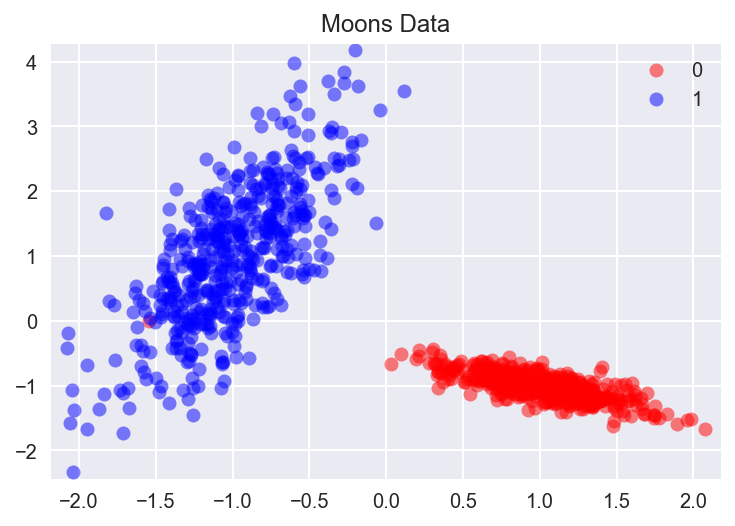

In [168]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=7, n_clusters_per_class=1)
plot_data(X, y)
plt.title('Moons Data')

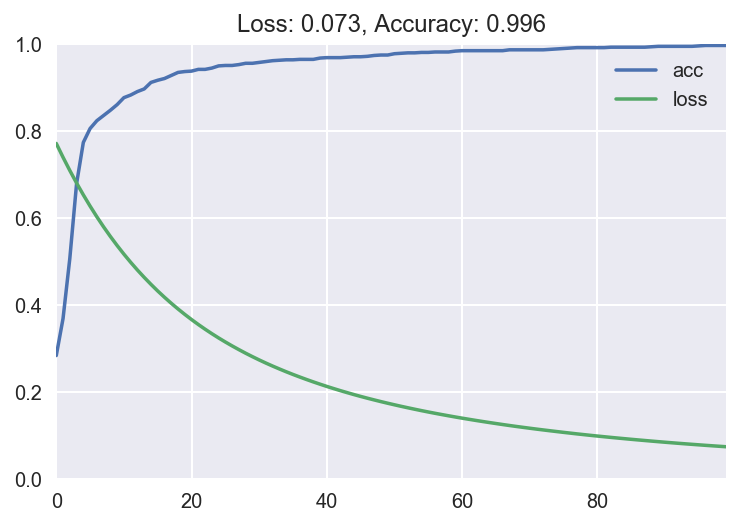

In [87]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, verbose=0, epochs=100)
plot_loss_accuracy(history)

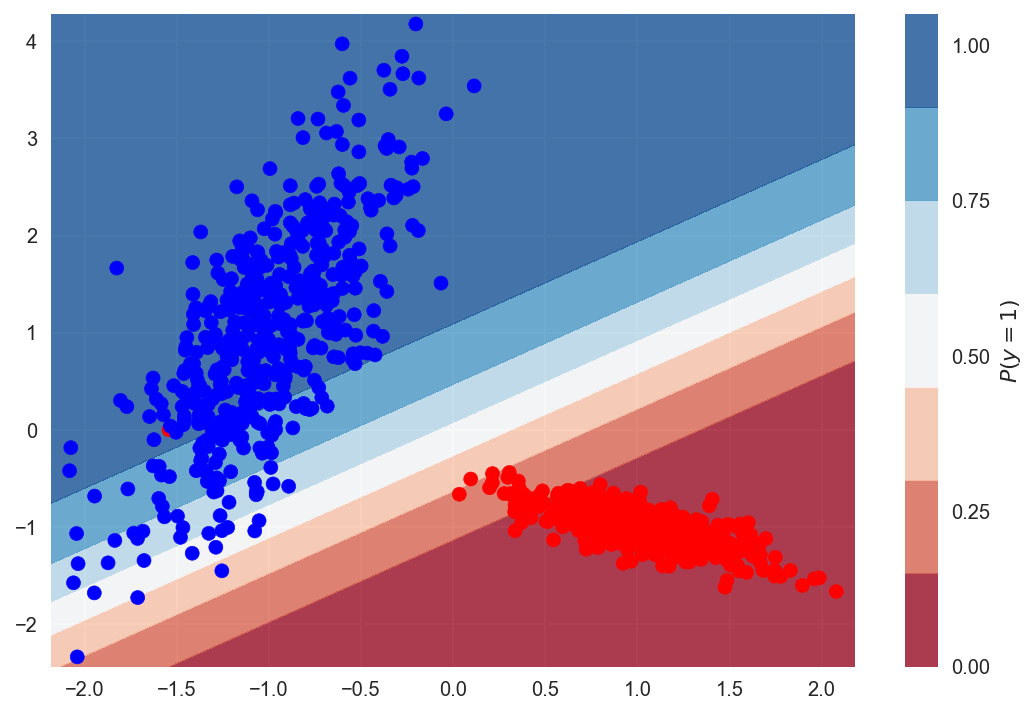

In [88]:
plot_decision_boundary(lambda x: model.predict(x), X, y)

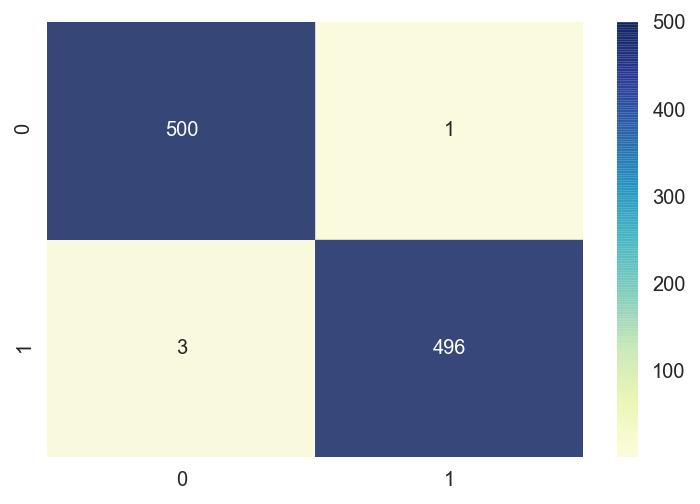

In [89]:
plot_confusion_matrix(model, X, y)

### Complex Data - Moons

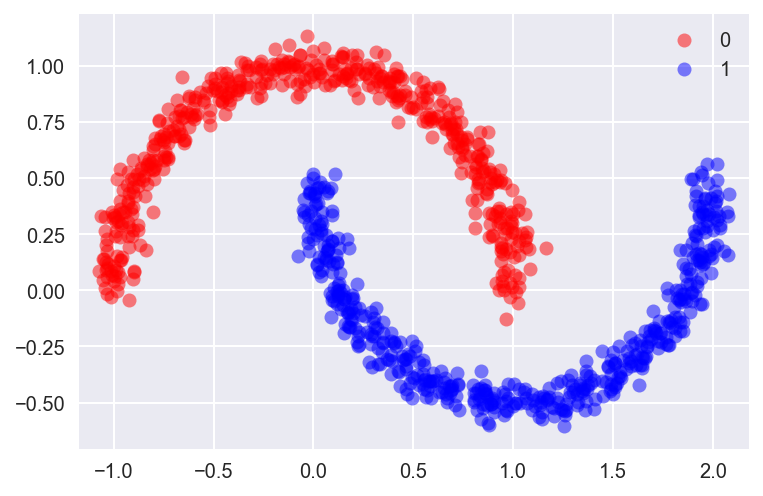

In [90]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)
plot_data(X, y)

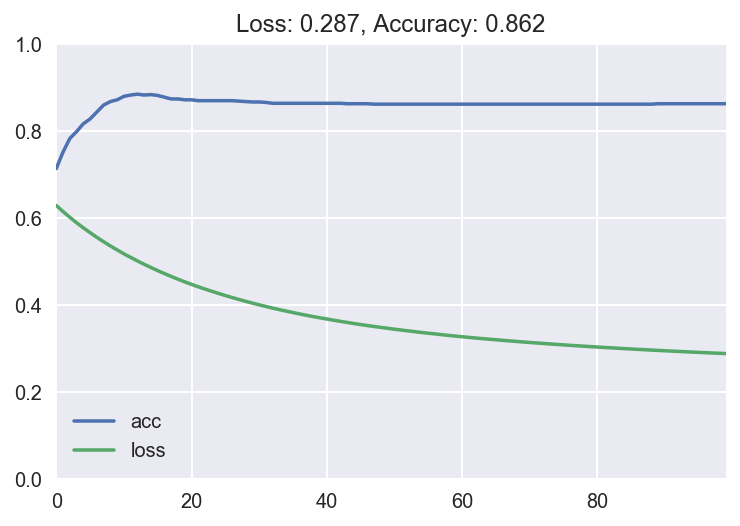

In [91]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, verbose=0, epochs=100)
plot_loss_accuracy(history)

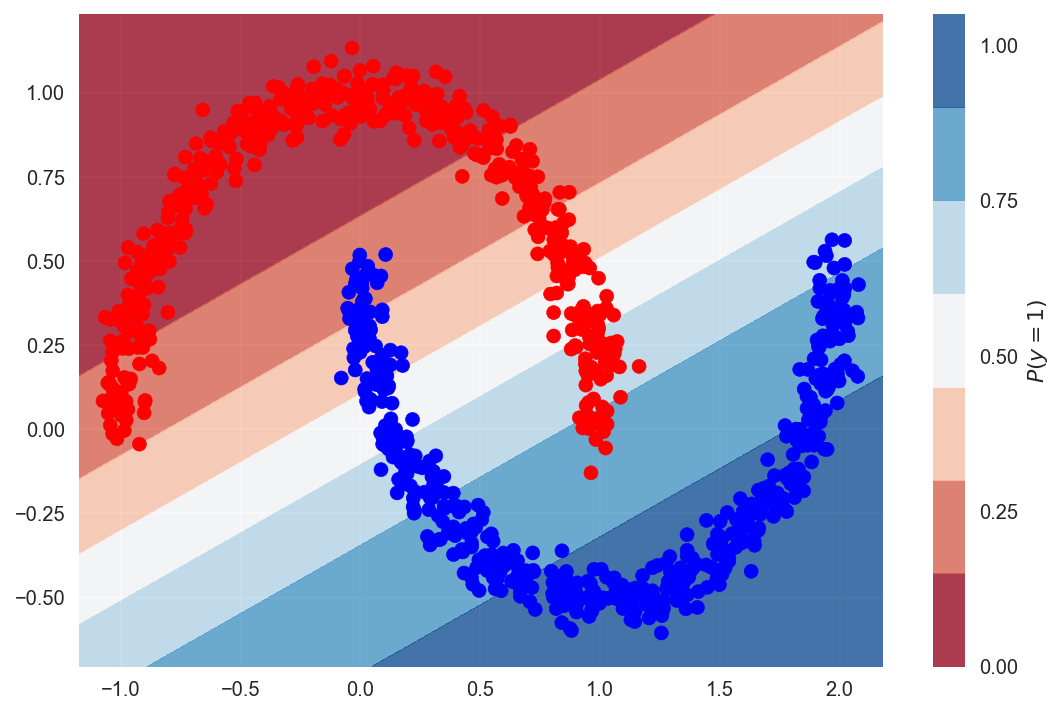

In [92]:
plot_decision_boundary(lambda x: model.predict(x), X, y)

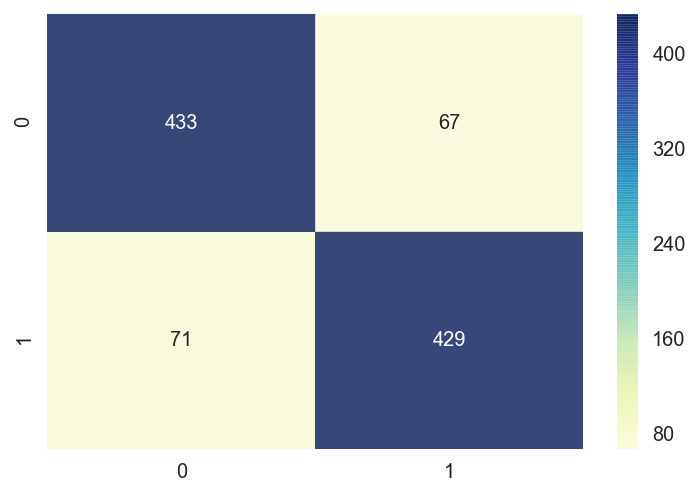

In [93]:
plot_confusion_matrix(model, X, y)

### Complex Data - Circles

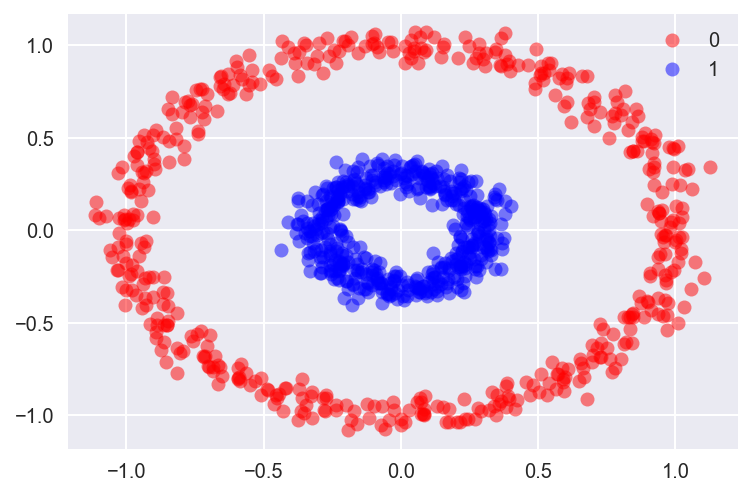

In [107]:
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.3, random_state=0)
plot_data(X, y)

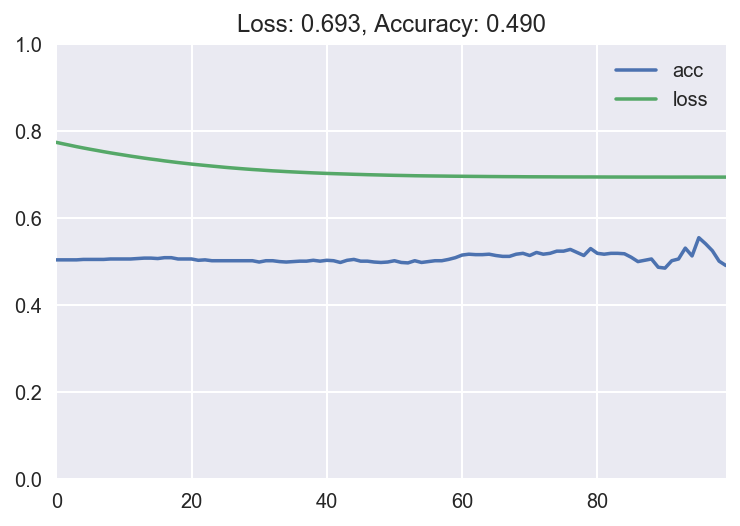

In [108]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, verbose=0, epochs=100)
plot_loss_accuracy(history)

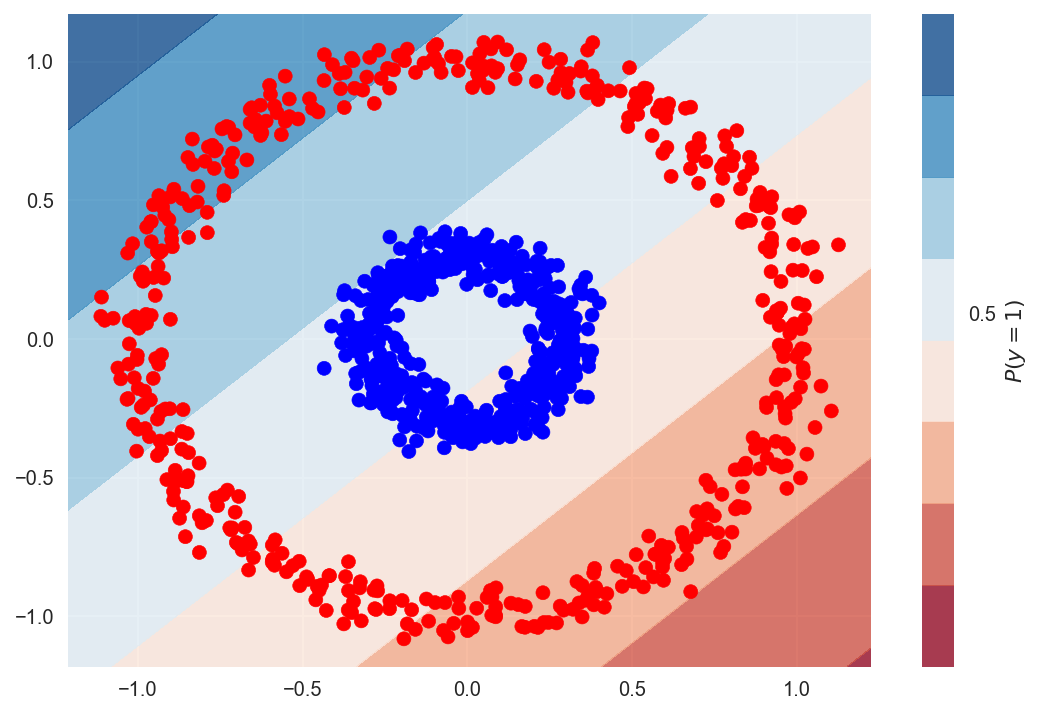

In [96]:
plot_decision_boundary(lambda x: model.predict(x), X, y)

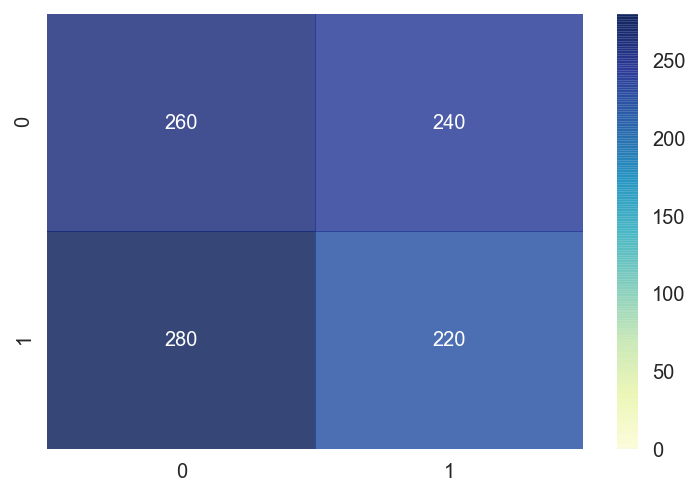

In [109]:
plot_confusion_matrix(model, X, y)

## Training a Deep Neural Network

### Complex Data - Moons

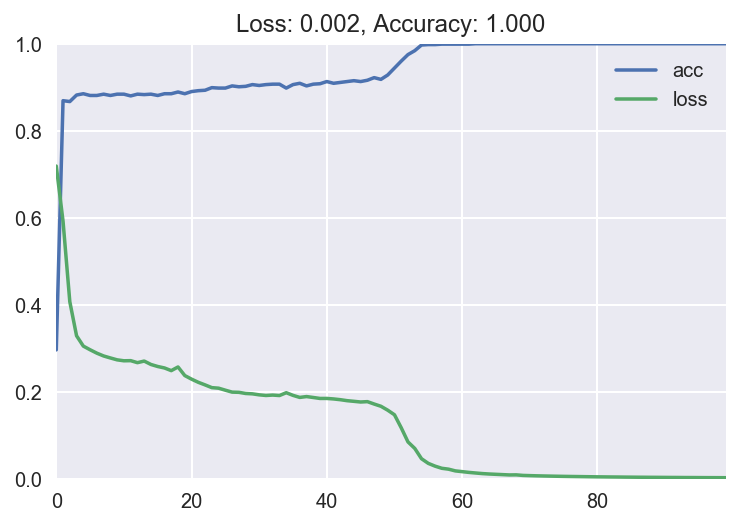

In [98]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)

model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, verbose=0, epochs=100)

plot_loss_accuracy(history)

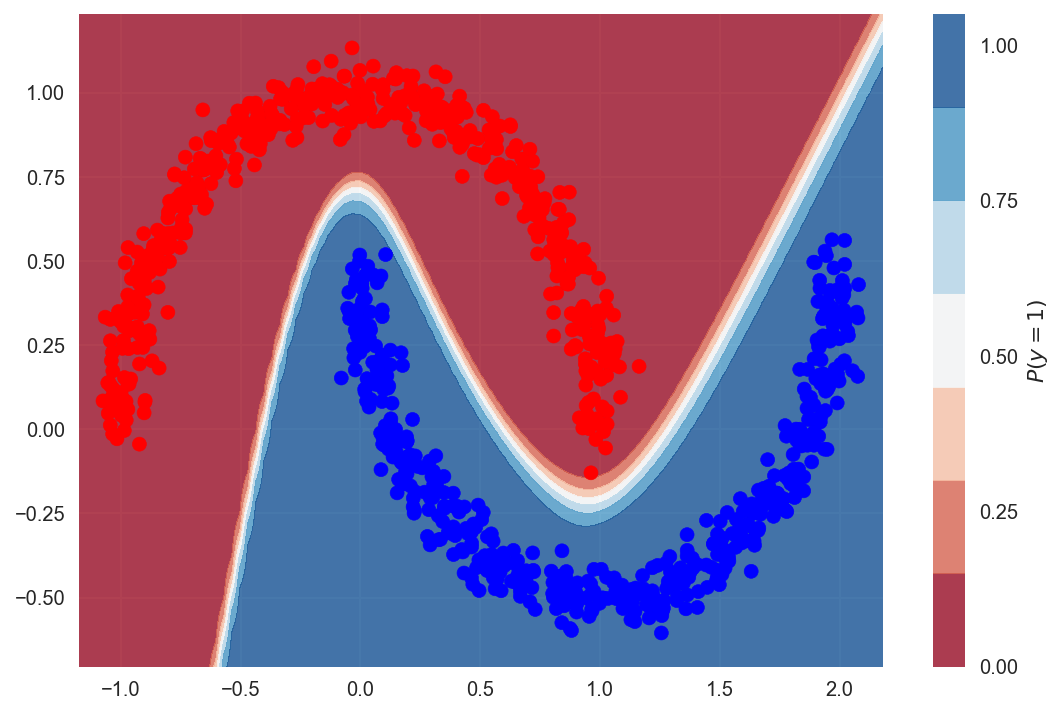

In [99]:
plot_decision_boundary(lambda x: model.predict(x), X, y)

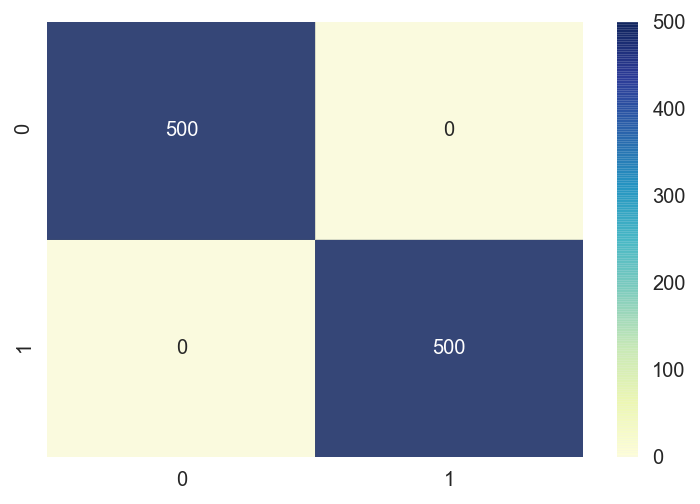

In [100]:
plot_confusion_matrix(model, X, y)

### Complex Data - Circles

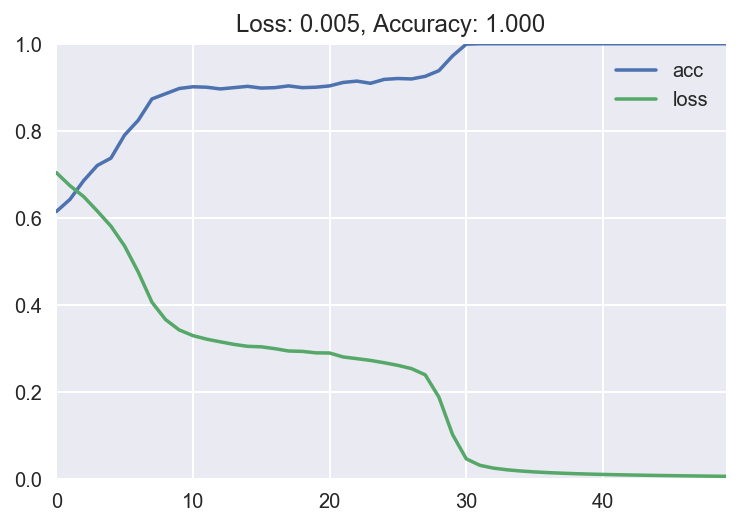

In [101]:
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.3, random_state=0)

model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, verbose=0, epochs=50)

plot_loss_accuracy(history)

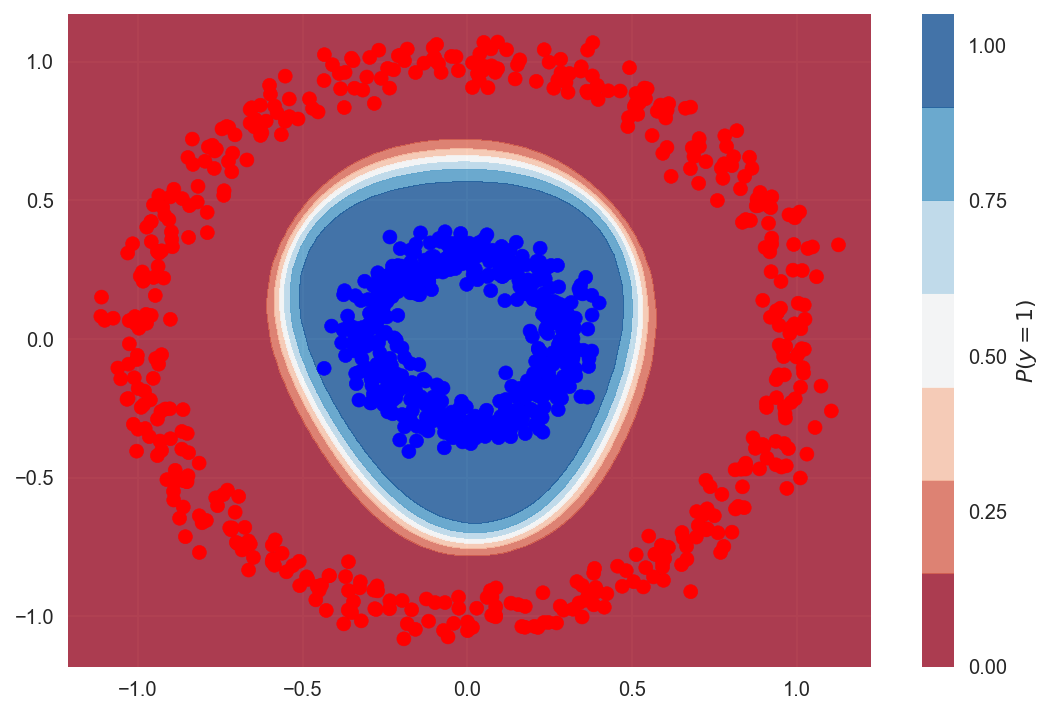

In [102]:
plot_decision_boundary(lambda x: model.predict(x), X, y)

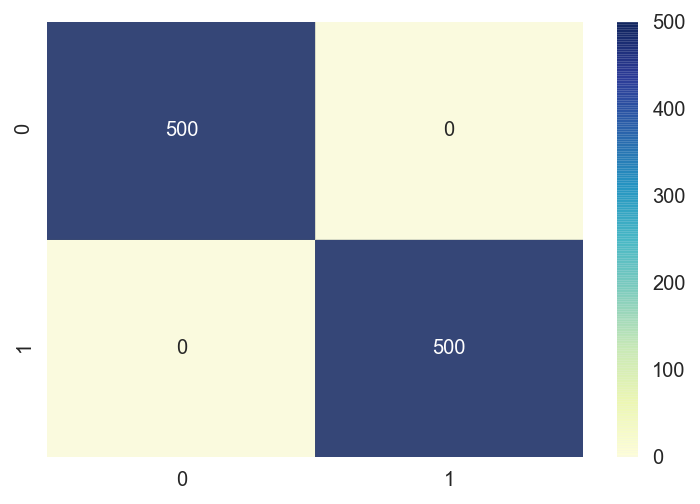

In [103]:
plot_confusion_matrix(model, X, y)

### Complex Data - Sine Wave

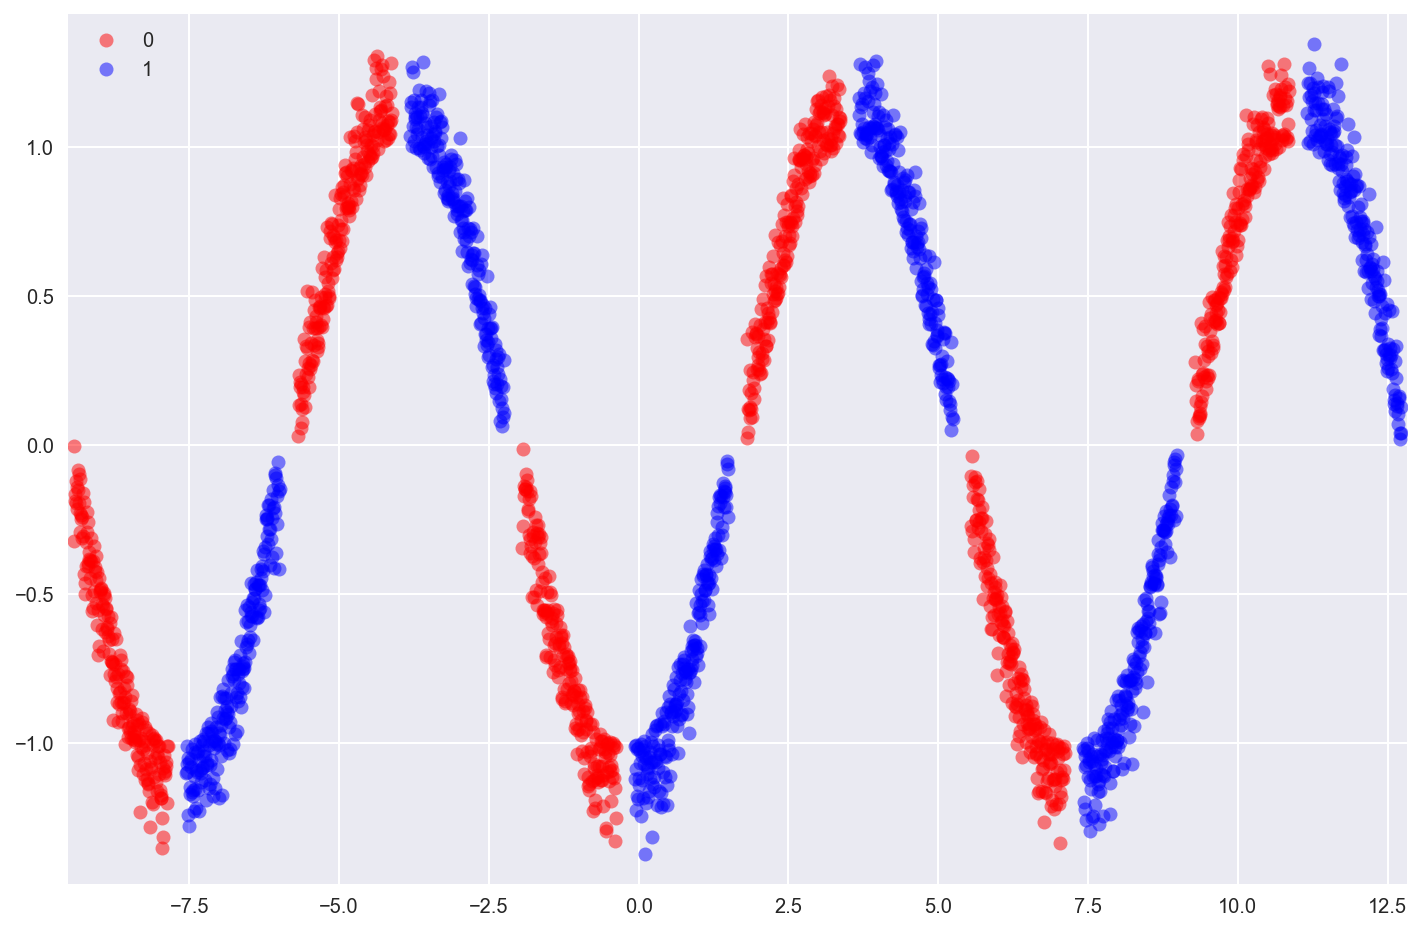

In [435]:
c = 3
num = 2400
# np.random.seed(0)
x0 = np.linspace(-c*np.pi, c*np.pi, num)
x1 = np.sin(x0)
noise = np.random.normal(0, 0.1, num) + 0.1
noise = np.sign(x1) * np.abs(noise)
x1  = x1 + noise
x0 = x0 + (np.asarray(range(num)) / step) * 0.3
X = np.column_stack((x0, x1))
step = num/(c*4)
y = np.asarray([int((i/step)%2==1) for i in range(len(x0))])

plt.figure(figsize=(12, 8))
plot_data(X, y)

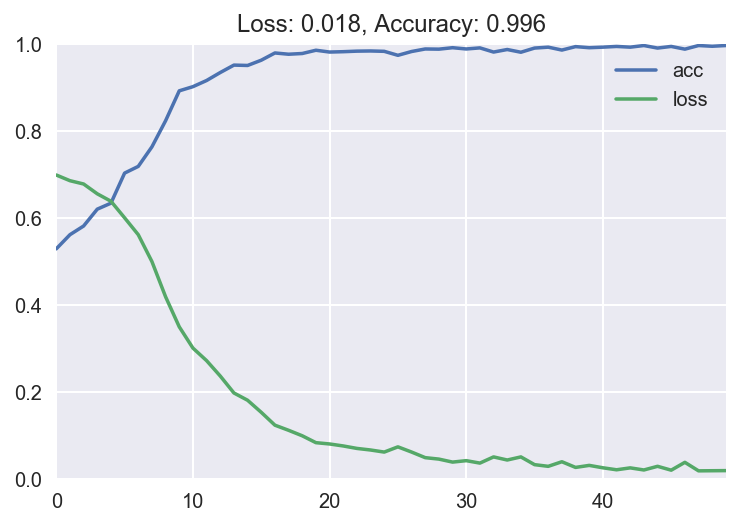

In [436]:
model = Sequential()
model.add(Dense(64, input_shape=(2,), activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, verbose=0, epochs=50)

plot_loss_accuracy(history)

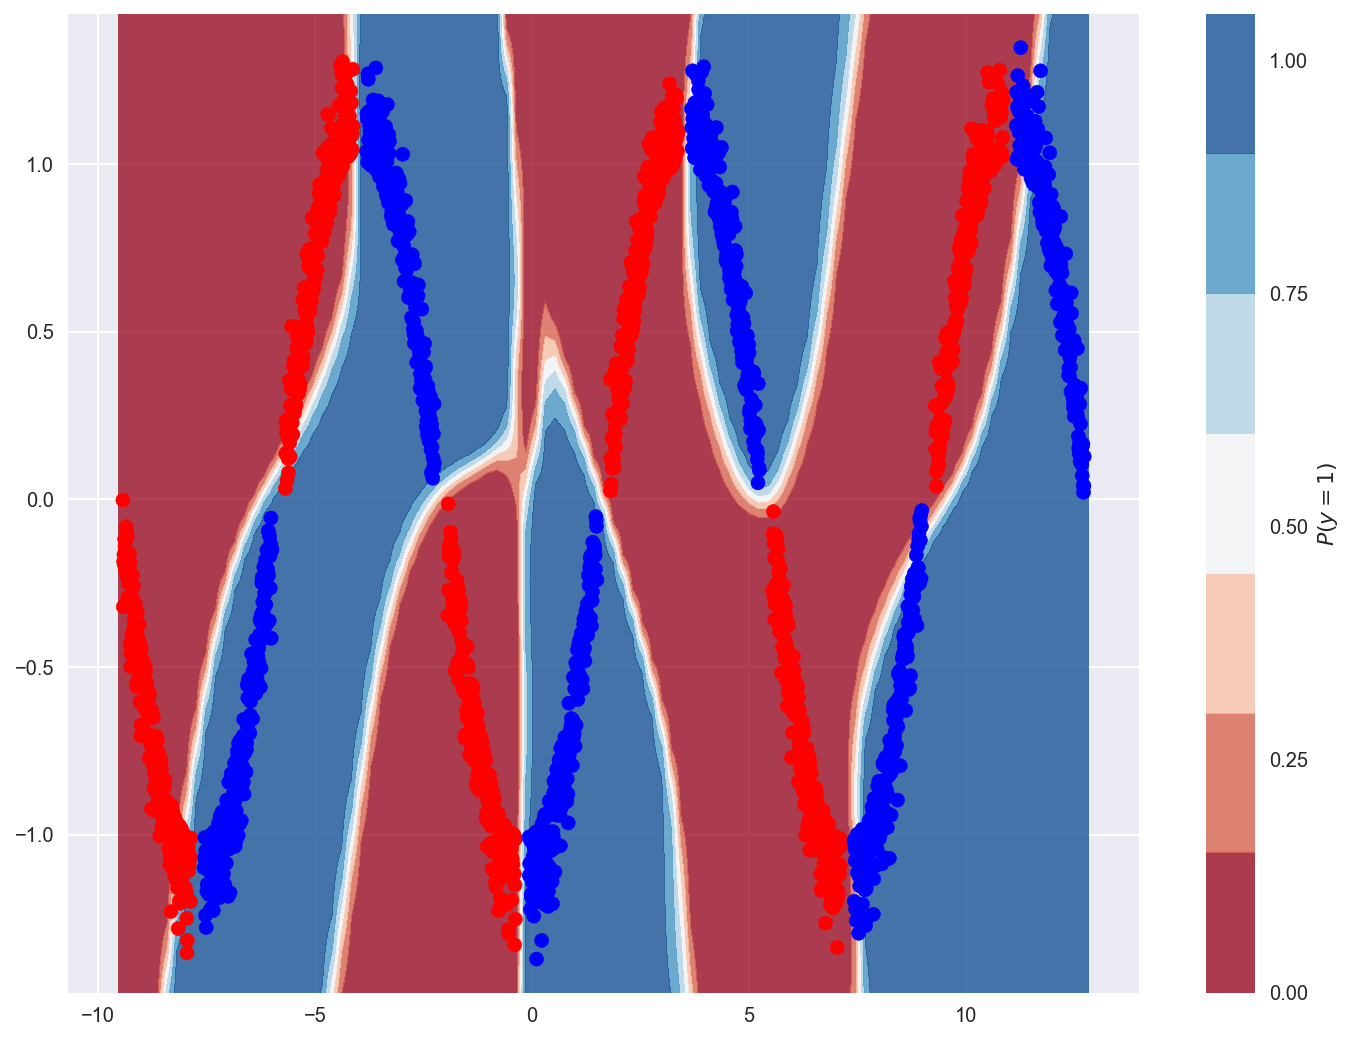

In [437]:
plot_decision_boundary(lambda x: model.predict(x), X, y, figsize=(12, 9))

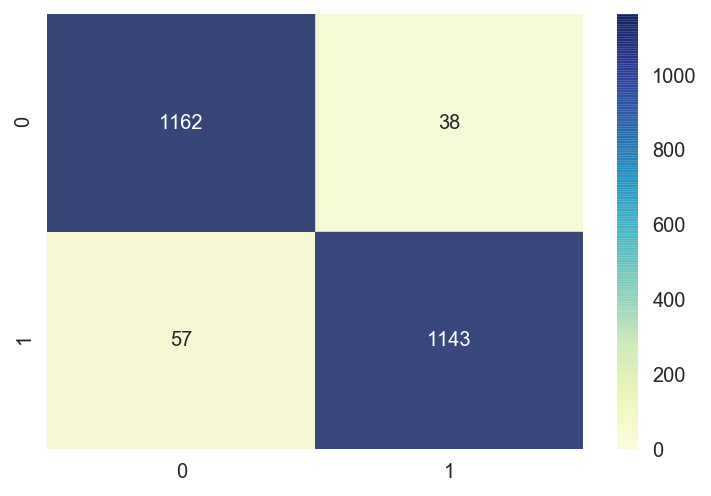

In [438]:
plot_confusion_matrix(model, X, y)

## Case Study - Binary Classification

### Data Visualization & Preparation

In [456]:
rawdf = pd.read_csv('../data/HR.csv')
rawdf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [477]:
rawdf.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [459]:
rawdf.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,"14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00"
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [460]:
(rawdf['left'].value_counts())/rawdf['left'].count()

0   0.76
1   0.24
Name: left, dtype: float64

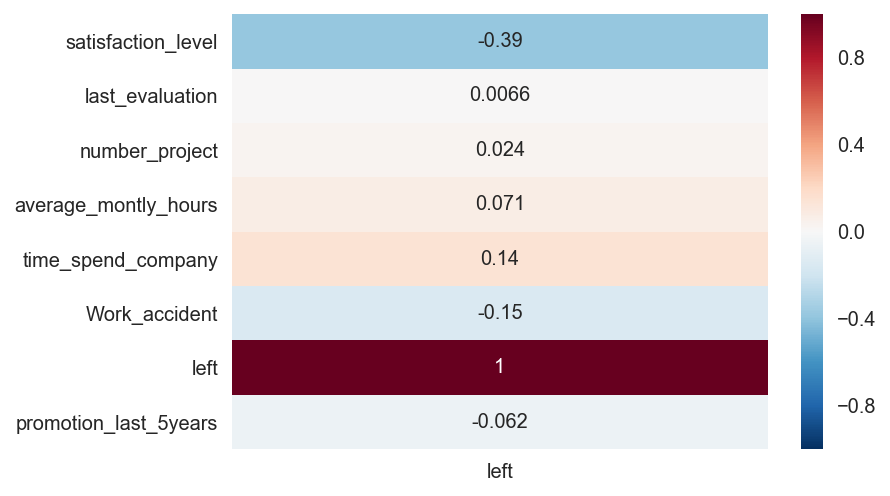

In [461]:
sns.heatmap(rawdf.corr()[['left']], annot=True, vmin=-1, vmax=1)

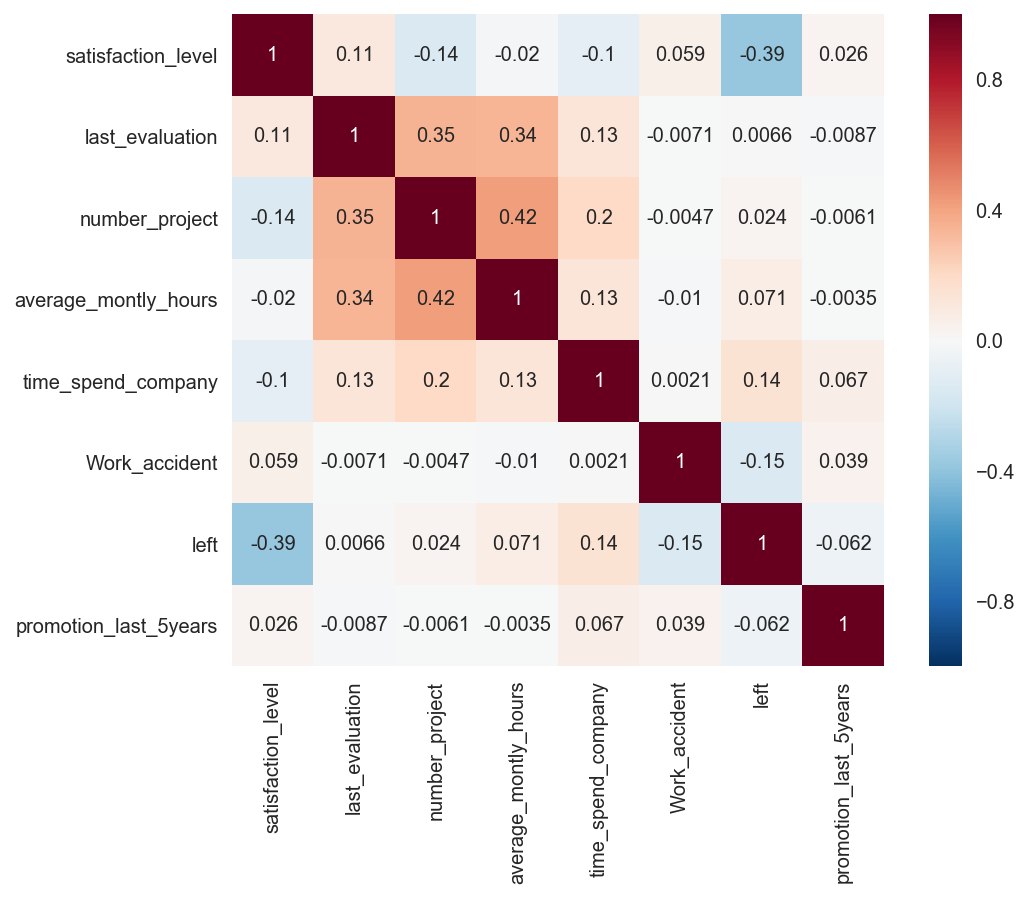

In [462]:
plt.figure(figsize=(8, 6))
sns.heatmap(rawdf.corr(), annot = True, square=True, vmin=-1, vmax=1)

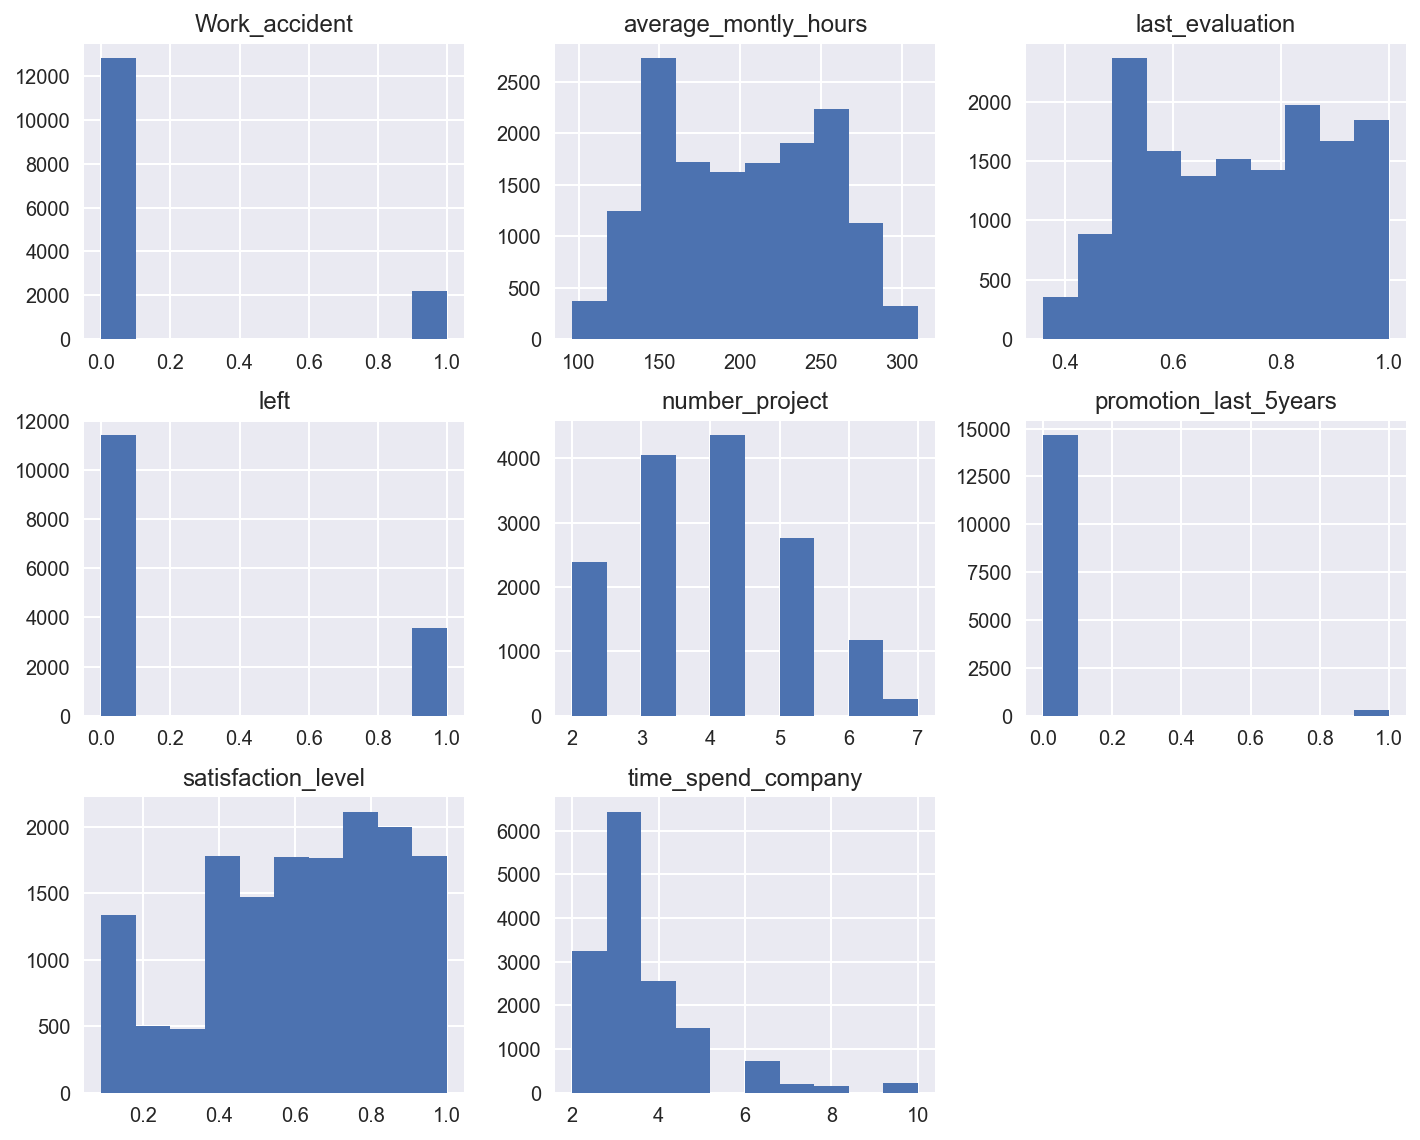

In [463]:
rawdf.hist(figsize=(10, 8))
plt.tight_layout()

In [482]:
df = rawdf.copy()

ss = StandardScaler()
scale_features = ['average_monthly_hours', 'number_project', 'time_spend_company']
df[scale_features] = ss.fit_transform(df[scale_features])

categorical_features = ['sales', 'salary']
df_cat = pd.get_dummies(df[categorical_features])
df = df.drop(categorical_features, axis=1)
df = pd.concat([df, df_cat], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,-1.46,-0.88,-0.34,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,0.97,1.22,1.71,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,2.59,1.42,0.34,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,0.97,0.44,1.03,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,-1.46,-0.84,-0.34,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [484]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
count,"14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00",...,"14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00"
mean,0.61,0.72,0.00,-0.00,-0.00,0.14,0.24,0.02,0.08,0.05,...,0.05,0.04,0.06,0.06,0.28,0.15,0.18,0.08,0.49,0.43
std,0.25,0.17,1.00,1.00,1.00,0.35,0.43,0.14,0.27,0.22,...,0.22,0.20,0.23,0.24,0.45,0.36,0.39,0.28,0.50,0.50
min,0.09,0.36,-1.46,-2.10,-1.03,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.44,0.56,-0.65,-0.90,-0.34,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.64,0.72,0.16,-0.02,-0.34,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.82,0.87,0.97,0.88,0.34,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,2.59,2.18,4.45,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [485]:
X = df.drop('left', axis=1).values
y = df['left'].values
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14999, 20) (14999,)
(10499, 20) (10499,) (4500, 20) (4500,)


### Logistic Regression Model

Epoch 1/5
10499/10499 [==============================] - 2s - loss: 0.4759 - acc: 0.7583       

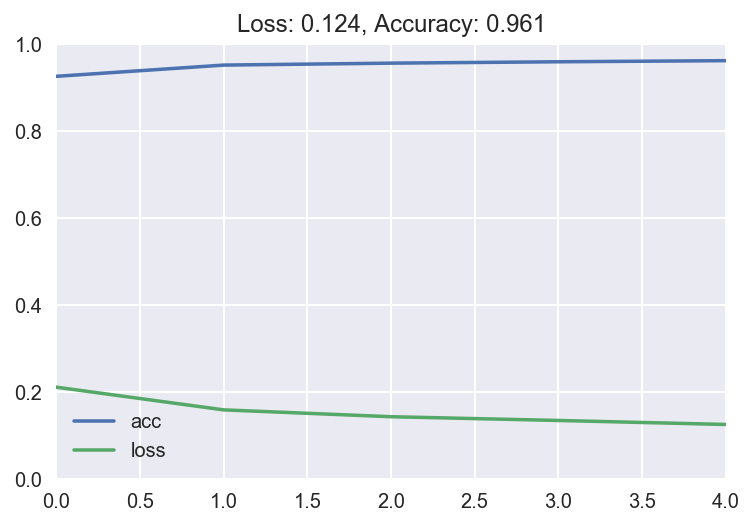

In [519]:
lr_model = Sequential()
lr_model.add(Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid'))

lr_model.compile(Adam(lr=0.03), 'binary_crossentropy', metrics=['accuracy'])

lr_history = lr_model.fit(X_train, y_train, verbose=1, epochs=5)
plot_loss_accuracy(history)

             precision    recall  f1-score   support

          0       0.85      0.90      0.87      3462
          1       0.58      0.47      0.52      1038

avg / total       0.79      0.80      0.79      4500



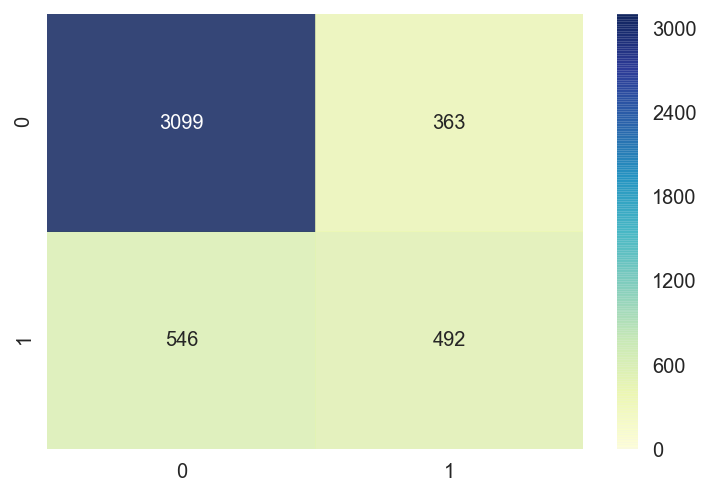

In [500]:
y_pred = lr_model.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(lr_model, X_test, y_test)

In [501]:
def get_model():
    return lr_model

model = KerasClassifier(build_fn=get_model, epochs=5, verbose=0)
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std()*2))

[ 0.453       0.92466667  0.921       0.854       0.51250417]
Accuracy: 73.30% (+/- 41.35%)


### Deep Model

Epoch 1/5
10499/10499 [==============================] - 3s - loss: 0.2128 - acc: 0.9245       

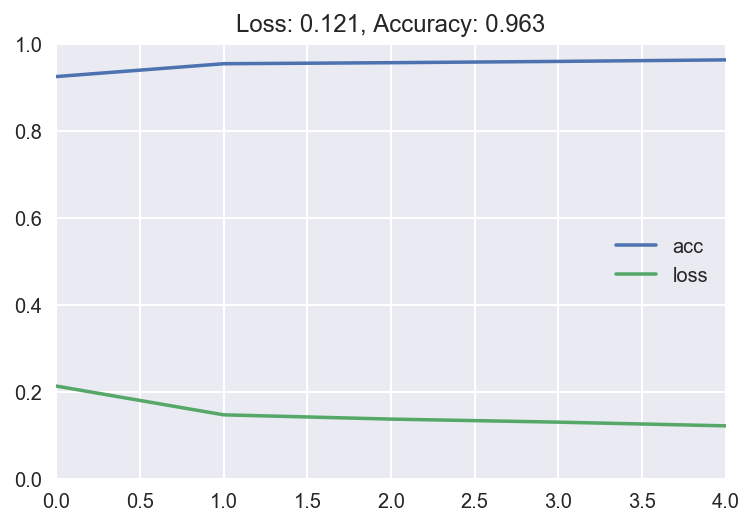

In [547]:
dropout_prob = 0.5
deep_model = Sequential()
deep_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
deep_model.add(Dense(32, activation='relu'))
deep_model.add(Dense(16, activation='relu'))
deep_model.add(Dense(1, activation='sigmoid'))

deep_model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

deep_history = deep_model.fit(X_train, y_train, verbose=1, epochs=5)
plot_loss_accuracy(deep_history)

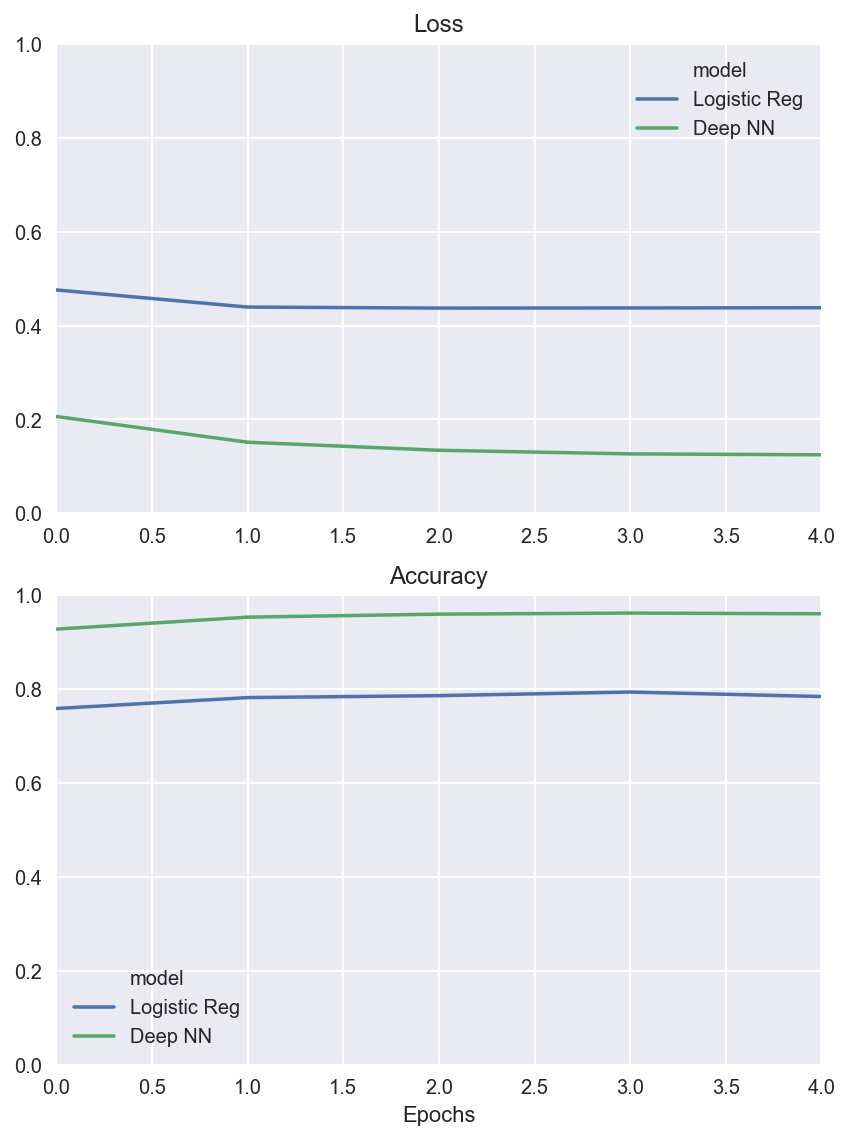

In [536]:
plot_compare_histories([lr_history, deep_history], ['Logistic Reg', 'Deep NN'])

             precision    recall  f1-score   support

          0       0.97      0.98      0.97      3462
          1       0.92      0.91      0.91      1038

avg / total       0.96      0.96      0.96      4500



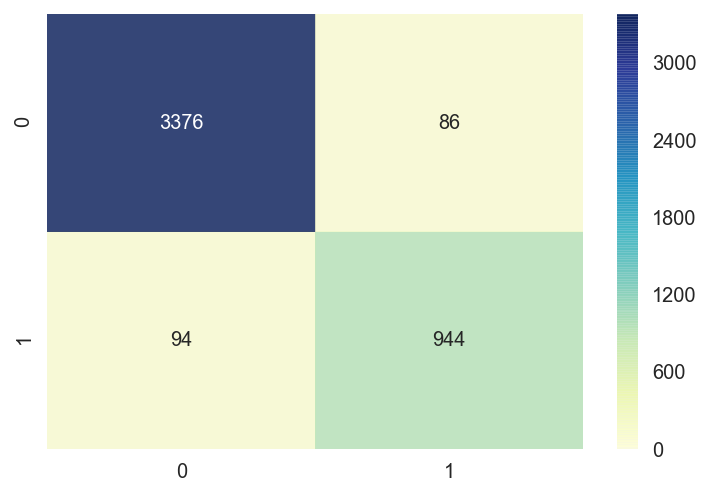

In [537]:
y_pred = deep_model.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(deep_model, X_test, y_test)

In [551]:
def get_model():
    return deep_model

model = KerasClassifier(build_fn=get_model, epochs=5, verbose=0)
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std()*2))

[ 0.891       0.97933333  0.983       0.98433333  0.95898633]
Accuracy: 95.93% (+/- 7.07%)


Epoch 1/5
10499/10499 [==============================] - 3s - loss: 0.4551 - acc: 0.7969       

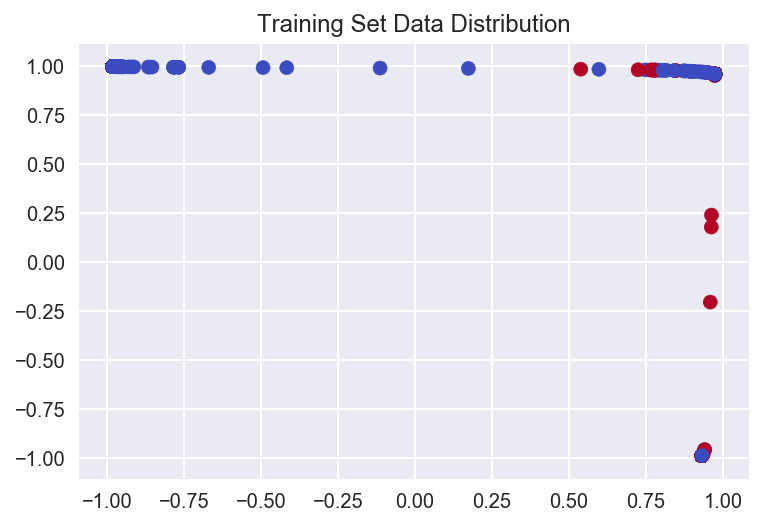

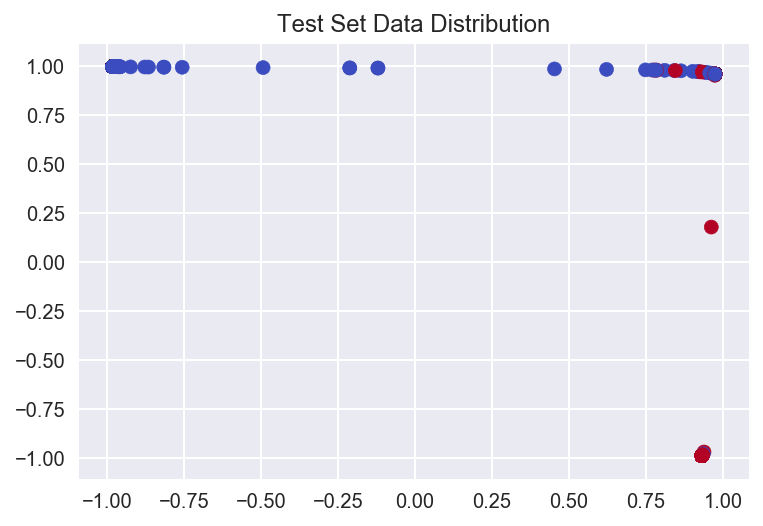

In [554]:
deep_model = Sequential()
deep_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='tanh'))
deep_model.add(Dense(32, activation='tanh'))
deep_model.add(Dense(16, activation='tanh'))
deep_model.add(Dense(4, activation='tanh'))
deep_model.add(Dense(2, activation='tanh'))
deep_model.add(Dense(1, activation='sigmoid'))

deep_model.compile(Adam(lr=0.03), 'binary_crossentropy', metrics=['accuracy'])

deep_model.fit(X_train, y_train, verbose=1, epochs=5)


inp = deep_model.layers[0].input
out = deep_model.layers[4].output

func = K.function([inp], [out])

features = func([X_train])[0]
plt.title('Training Set Data Distribution')
plt.scatter(features[:, 0], features[:, 1], c=y_train, cmap='coolwarm')
plt.show()

features = func([X_test])[0]
plt.title('Test Set Data Distribution')
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')